In [1]:
import glob
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
text = ""
for filename in glob.glob("./*.txt"):
    f = open(filename, 'r', encoding='utf8')
    text += (f.read())
    f.close()
print(len(text))

2993415


In [3]:
text[1000:2000]

"естьями фамилии Бонапарте. Нет, я вас предупреждаю, если вы мне не скажете, что у нас война, если вы еще позволите себе защищать все гадости, все ужасы этого Антихриста (право, я верю, что он Антихрист) – я вас больше не знаю, вы уж не друг мой, вы уж не мой верный раб, как вы говорите.] Ну, здравствуйте, здравствуйте. Je vois que je vous fais peur, [Я вижу, что я вас пугаю,] садитесь и рассказывайте.\n\nТак говорила в июле 1805 года известная Анна Павловна Шерер, фрейлина и приближенная императрицы Марии Феодоровны, встречая важного и чиновного князя Василия, первого приехавшего на ее вечер. Анна Павловна кашляла несколько дней, у нее был грипп, как она говорила (грипп был тогда новое слово, употреблявшееся только редкими). В записочках, разосланных утром с красным лакеем, было написано без различия во всех:\n\n«Si vous n'avez rien de mieux a faire, M. le comte (или mon prince), et si la perspective de passer la soiree chez une pauvre malade ne vous effraye pas trop, je serai charmee

In [4]:
text = re.sub('[^а-яА-Я ]','', text)

In [5]:
text[1000:2000]

'ез различия во всех           или                                  Если  вас граф или князь нет в виду ничего лучшего и если перспектива вечера у бедной больной не слишком вас пугает то я буду очень рада видеть вас нынче у себя между семью и десятью часами Анна Шерер     О какое жестокое нападение  отвечал нисколько не смутясь такою встречей вошедший князь в придворном шитом мундире в чулках башмаках при звездах с светлым выражением плоского лица Он говорил на том изысканном французском языке на котором не только говорили но и думали наши деды и с теми тихими покровительственными интонациями которые свойственны состаревшемуся в свете и при дворе значительному человеку Он подошел к Анне Павловне поцеловал ее руку подставив ей свою надушенную и сияющую лысину и покойно уселся на диване          Прежде всего скажите как ваше здоровье Успокойте друга  сказал он не изменяя голоса и тоном в котором изза приличия и участия просвечивало равнодушие и даже насмешка Как можно быть здоровой когда

In [6]:
text = re.sub(' +',' ', text)

In [7]:
text[1000:2000]

'ерспектива вечера у бедной больной не слишком вас пугает то я буду очень рада видеть вас нынче у себя между семью и десятью часами Анна Шерер О какое жестокое нападение отвечал нисколько не смутясь такою встречей вошедший князь в придворном шитом мундире в чулках башмаках при звездах с светлым выражением плоского лица Он говорил на том изысканном французском языке на котором не только говорили но и думали наши деды и с теми тихими покровительственными интонациями которые свойственны состаревшемуся в свете и при дворе значительному человеку Он подошел к Анне Павловне поцеловал ее руку подставив ей свою надушенную и сияющую лысину и покойно уселся на диване Прежде всего скажите как ваше здоровье Успокойте друга сказал он не изменяя голоса и тоном в котором изза приличия и участия просвечивало равнодушие и даже насмешка Как можно быть здоровой когда нравственно страдаешь Разве можно оставаться спокойною в наше время когда есть у человека чувство сказала Анна Павловна Вы весь вечер у меня

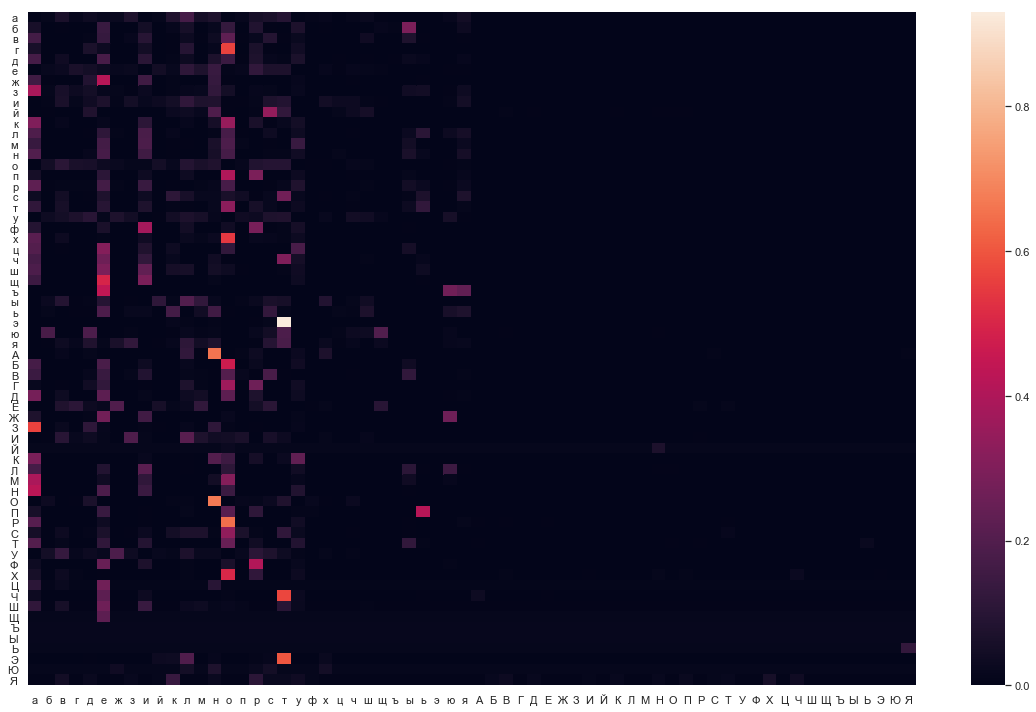

In [8]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
RUSSIAN += RUSSIAN.upper()
POS = {l: i for i, l in enumerate(RUSSIAN)}

probabilities = np.ones((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text[:-1], text[1:]):
    if (cp!=' ') and (cn!=' '):
        probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
    

df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

plt.figure(figsize=(16,10))
sns.heatmap(df, xticklabels=True, yticklabels=True)
plt.tight_layout()
plt.show()

In [9]:
df.head()

,а,б,в,г,д,е,ж,з,и,й,...,Ц,Ч,Ш,Щ,Ъ,Ы,Ь,Э,Ю,Я
а,0.000156,0.011540,0.062077,0.015896,0.036020,0.018248,0.022398,0.075898,0.002245,0.012180,...,0.000014,0.000107,0.000036,0.000007,0.000007,0.000007,0.000007,0.000050,0.000007,0.000043
б,0.059204,0.000674,0.005826,0.000755,0.001618,0.141308,0.000539,0.000081,0.050249,0.000027,...,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027
в,0.166518,0.000371,0.000964,0.001126,0.008962,0.132898,0.000035,0.015045,0.094612,0.000012,...,0.000023,0.000070,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000023,0.000012
г,0.059897,0.000024,0.002393,0.000095,0.065844,0.029854,0.000071,0.000095,0.046036,0.000024,...,0.000024,0.000071,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024
д,0.167532,0.001356,0.038836,0.000293,0.001140,0.176039,0.000601,0.000123,0.103392,0.000031,...,0.000015,0.000046,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015


In [10]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
proba_sum = 0.
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        proba_sum += proba
#        if proba > 0:
#            print(''.join(['п', c1, c2, 'р']), proba)

In [11]:
proba_sum

0.0006258721718769551

In [12]:
s = []
start = 'Б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

Бчтдальми


#### Прогноз с использованием HMM 

In [13]:
from hmmlearn.hmm import GaussianHMM

In [17]:
series = pd.read_csv("mean-monthly-air-temperature-deg.csv").iloc[:, -1]

In [18]:
from hmmlearn.hmm import GaussianHMM
import warnings
warnings.filterwarnings('ignore')

In [19]:
values = series.values.reshape(-1,1)

In [20]:
X_train = values[:100]
X_test = values[100:]

In [21]:
X_train.shape, X_test.shape

((100, 1), (140, 1))

In [22]:
for n in range(1, 20):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(X_train)
    print (n, model.score(X_train))

1 -350.921693278077
2 -310.80816596610805
3 -299.43469496673697
4 -290.70434555839927
5 -274.6540267865124
6 -260.9992409834856
7 -250.85579700759428
8 -244.2295919623939
9 -238.23704211960484
10 -234.49087162025504
11 -227.98160414794143
12 -224.0525338928832
13 -210.7414753675786
14 -213.83982960601477
15 -203.43307276185755
16 -195.17603367318975
17 -192.48178495109892
18 -192.1293310862547
19 -180.37247366513455


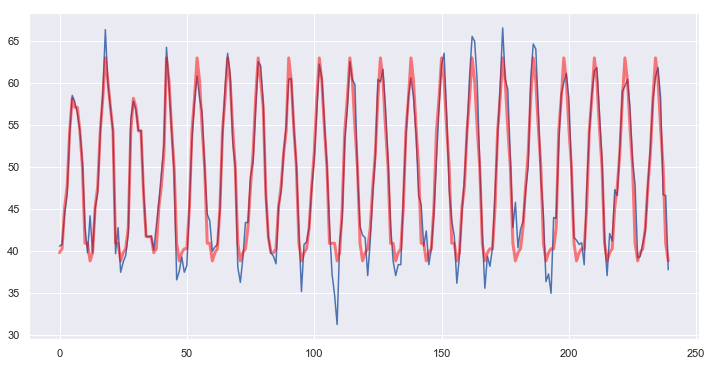

In [24]:
model = GaussianHMM(n_components=19,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(X_train)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3, alpha=0.5, color='red')